In [179]:
import pandas as pd
import numpy as np
import sklearn as skl

In [220]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()

In [221]:
irisDf = pd.DataFrame(datasets.load_iris().data, columns=iris.feature_names)
irisDf.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [222]:
irisDf.shape

(150, 4)

In [223]:
ourTarget = iris.target
print(ourTarget.shape)
print(np.unique(ourTarget))
print(ourTarget)
irisDf['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(irisDf['species'])

(150,)
[0 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica

In [224]:
train, test = train_test_split(irisDf, test_size=0.2, random_state=14)
print(train.shape, test.shape)
print(train.head())
print(test.head())

(120, 5) (30, 5)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
39                5.1               3.4                1.5               0.2   
93                5.0               2.3                3.3               1.0   
73                6.1               2.8                4.7               1.2   
14                5.8               4.0                1.2               0.2   
69                5.6               2.5                3.9               1.1   

       species  
39      setosa  
93  versicolor  
73  versicolor  
14      setosa  
69  versicolor  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
24                 4.8               3.4                1.9               0.2   
42                 4.4               3.2                1.3               0.2   
6                  4.6               3.4                1.4               0.3   
53                 5.5               2.3                4.0               1.

In [225]:
# >>> from sklearn.ensemble import RandomForestClassifier
# >>> from sklearn.datasets import make_classification
# >>>
# >>> X, y = make_classification(n_samples=1000, n_features=4,
# ...                            n_informative=2, n_redundant=0,
# ...                            random_state=0, shuffle=False)
# >>> clf = RandomForestClassifier(max_depth=2, random_state=0)
# >>> clf.fit(X, y)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
# >>> print(clf.feature_importances_)
# [ 0.17287856  0.80608704  0.01884792  0.00218648]
# >>> print(clf.predict([[0, 0, 0, 0]]))
# [1]

In [226]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [227]:

features = irisDf.columns[:4]

clf = RandomForestClassifier(n_jobs=2)

clf.fit(train[features], train['species'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [228]:
ourPred = clf.predict(test[features])
clf.predict_proba(test[features])[0:149]

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.1,  0.9],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ]])

In [229]:
pd.crosstab(test['species'], ourPred, rownames=['Actual'], colnames=['ourPreds'])

ourPreds,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,9,0
virginica,0,1,6


In [230]:
print(ourPred)
print( test['species'])

['setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa']
24         setosa
42         setosa
6          setosa
53     versicolor
113     virginica
58     versicolor
40         setosa
96     versicolor
23         setosa
97     versicolor
106     virginica
18         setosa
103     virginica
141     virginica
20         setosa
89     versicolor
29         setosa
112     virginica
148     virginica
95     versicolor
5          setosa
22         setosa
7          setosa
54     versicolor
44         setosa
108     virginica
2          setosa
92     versicolor
66     versicolor
47         setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]


In [231]:
features2 = irisDf.columns[:2]
clf.fit(train[features2], train['species'])
ourPred2 = clf.predict(test[features2])
clf.predict_proba(test[features2])[0:149] #note the reduced confidence!

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.9       ,  0.1       ],
       [ 0.        ,  0.7       ,  0.3       ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.9       ,  0.1       ],
       [ 0.        ,  0.9       ,  0.1       ],
       [ 0.4       ,  0.5       ,  0.1       ],
       [ 0.        ,  0.8       ,  0.2       ],
       [ 0.        ,  0.78666667,  0.21333333],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.9       ,  0.1       ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.325     ,  0.675     ],
       [ 0.        ,  0.225     ,  0.775     ],
       [ 0.        ,  0.7       ,  0.3       ],
       [ 1.        ,  0.        ,  0.   

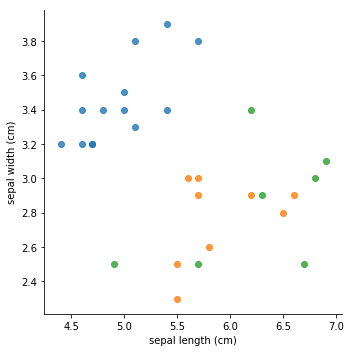

In [248]:
import seaborn as sb

#sb.regplot(data=test, x='sepal length (cm)', y='sepal width (cm)', fit_reg=False) #HUE argument doesnt work for regplot!
sb.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=test, hue="species", fit_reg=False, legend=False)
plt.show()